### MSE (평균제곱오차)
  - 모델의 성능 및 손실 측정

### 정확도(R^2)
  - 정확도는 단순한 비율이기 때문에 손실함수로 사용하기에는 어렵다
  - log 함수 혹은 크로스 앤트로피 함수 등을 사용한다

### Tree Model(레드 와인과 화이트 와인)



In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [6]:
wine.head( )

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:

wine.info()  ## info() 함수는 pandas DataFrame 만 적용 가능하다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


## 데이터 준비하기
  - 만약 Null 값들이 존재하면 mean(평균) , 혹은 median(중앙값) 들을 사용하여 Null 값들을 채우거나, 혹은 Null 값들을 삭제할 수 있다.  
  - 만약, mean, median 값으로 Null 값들을 채운다면, 훈련 데이터에서 채운 mean 값들과 median 값들을 모델에 훈련 시킨 다음 테스트 데이터를 적용할 시 훈련 데이터에 있는 mean 값과 median값으로 채워야 한다.
  - 이는 동일하게 학습시킨 모델의 일관성을 유지하기 위해서이다.

  - 표준화(Standardizaition) 에서도 동일하게 훈련데이터에서 표준화를 적용하였다면, 모델을 학습시킨 후 테스트 데이터에서도 훈련데이터와 동일한 평균과 표준편차를 사용하여 적용하여야 한다,  

In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### 독립변수와 종속변수를 나누기

In [7]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

### 독립변수와 종속변수 데이터를 각각 훈련 데이터와 테스트 데이터로 나누기

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [9]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


### 독립 변수의 훈련 데이터를 StandardScaler를 사용하여 표준화를 적용하기
   - fit 모듈을 적용하여 변환 모델을 학습시기고 각각 독립변수의 훈련데이터와 테스트 데이터를 훈련데이터가 학습한 모델에 transform 메소드를 적용한다.

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [12]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


### 결정트리

In [30]:
from sklearn.tree import DecisionTreeClassifier  ## <-> 회귀모델은 DesisionTreeRegressor

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 결정트리의 각 depth의 숫자
print(dt.get_depth())

0.996921300750433
0.8592307692307692
21


  - DecisionTreeClassifier 메소드의 매개변수 중 하나가 max_features 이며 , 특성의 갯수를 조정할 수 있다. default 값은 None 이며, 모든 특성을 사용한다.

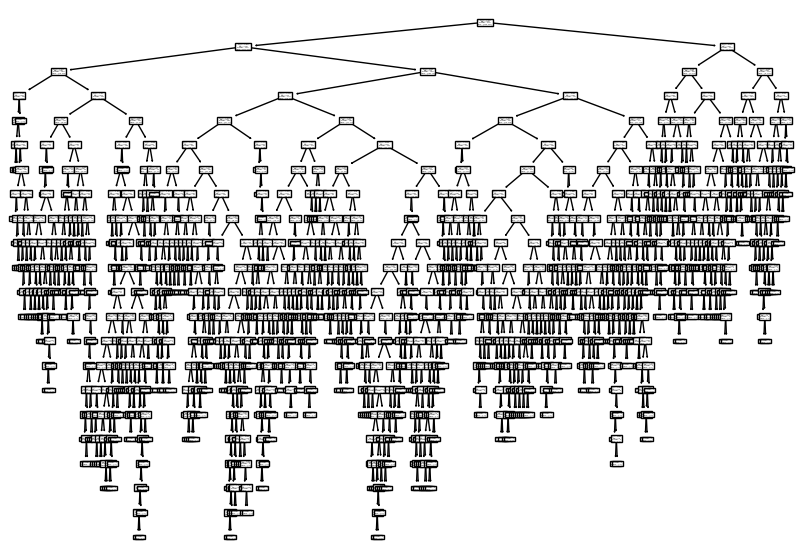

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

### 결정 트리분석

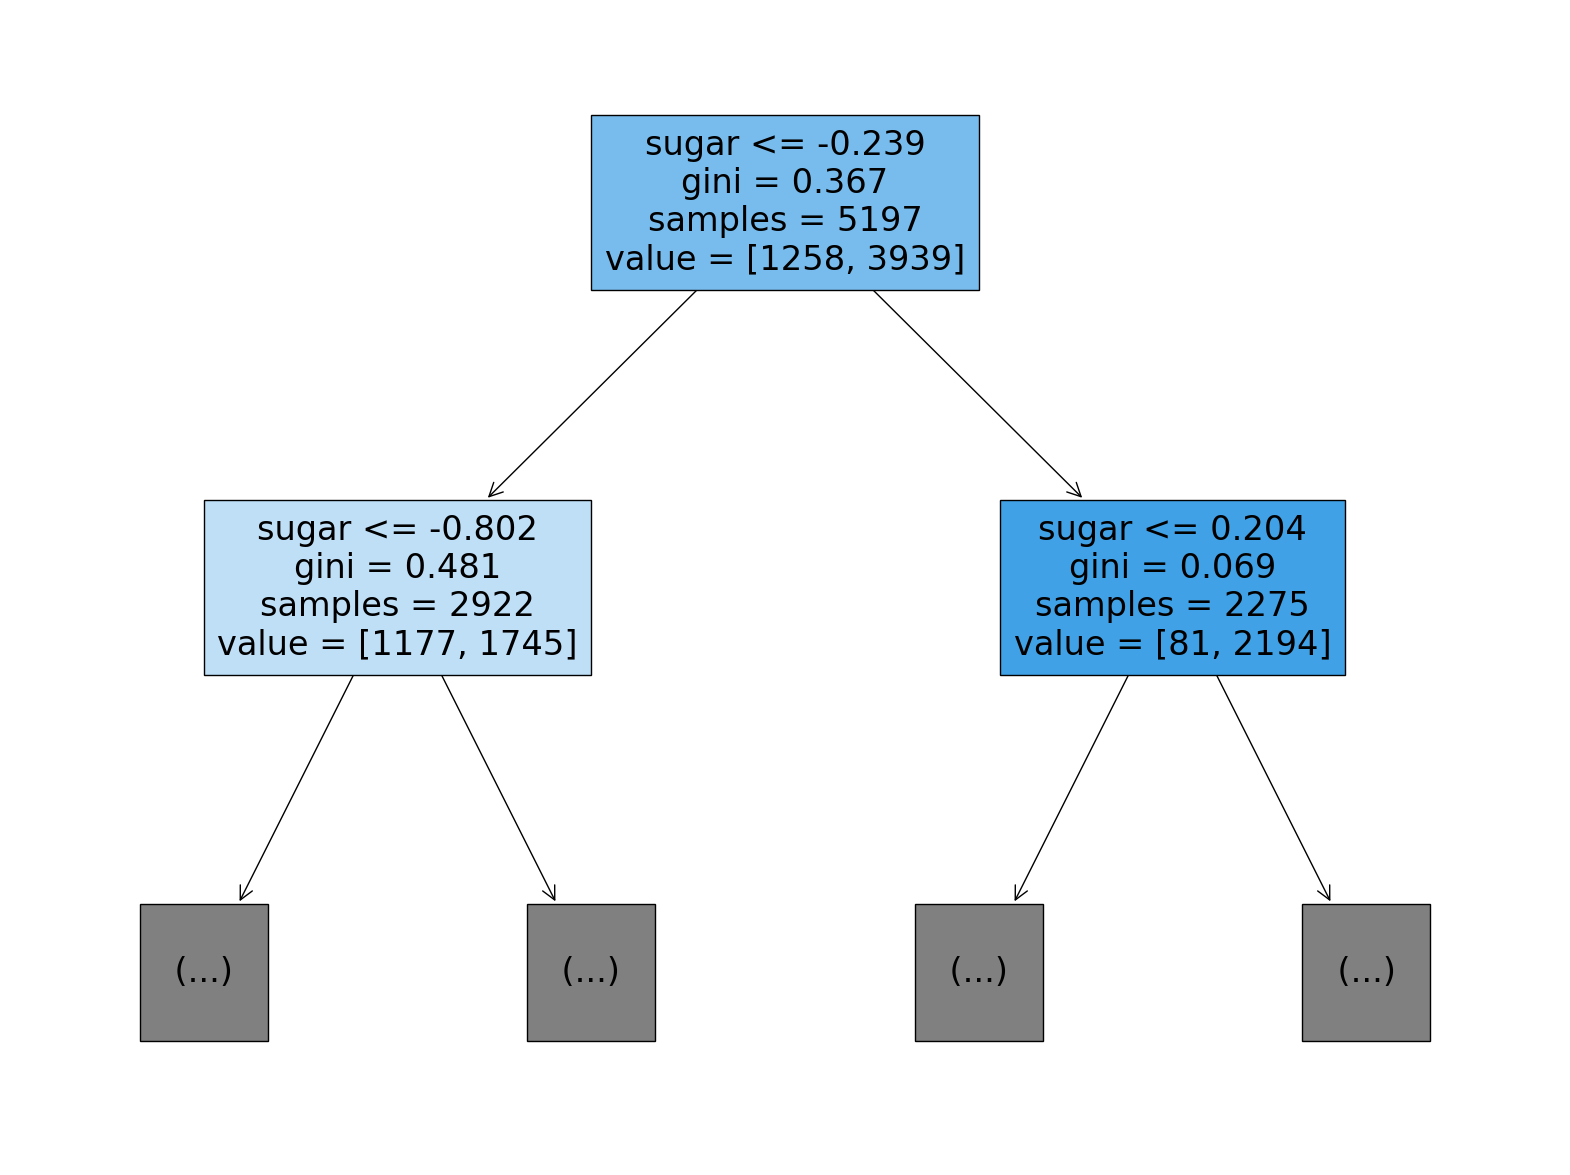

In [18]:
plt.figure(figsize=(20, 15))
plot_tree(dt, max_depth =1 , filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 지니 불순도    ( criterion = 'gini')

  - 지니 불순도 = 1 - (음성클래스 비율^2 + 양성클래스 비율^2 )
  - 1 - ((1258/5197)^2 + (3939/5197)^2) = 0.367
  - 1 - ((50/100)^2 + (50/100)^2) = 0.5 (가장 높음)
  - 1 - ((0/100)^2 + (100/100)^2) = 0 (가장 작음)
  - 지니 불순도는 0 ~ 0.5 의 값을 가진다.


  - 부모노드와 자식노드의 불순도 차이(정보이득) =  부모의 불순도 - (왼쪽노드의 샘플수 / 부모의 샘플수) * 왼쪽노드의 불순도 - (오른쪽 노드의 샘플수/부모의 샘플수) * 오른쪽 노드의 불순도

In [20]:
a = 0.367 - (2922/5197) * 0.481 - (2275/5197) * 0.069

In [23]:
print(f'정보이득  : {a:.4f}')

부모노드와 자식노드의 불순도 차이 : 0.0664


  - 결정트리 알고리즘은 정보이득이 커지는 쪽으로 분할을 해나간다.(정보이득 최대화) 순수 노드(불순도가 전혀 없는 노드)가 될때까지 무한 반복

  - 또한 분할 되는 노드들의 불순도가 최소화 되는 방향으로 분할을 해나간다.


### 가지치기

  - DecisionTreeClassifier 함수의 매개변수 중 max_depth를 활용하여 트리 전체의 갯수를 제한하여 과대 적합을 방지 할 수 있다.
  - DecisionTreeClassifier 알고리즘의 하이퍼파라미터로서 max_depth 변수를 활용해서 전체 트리의 갯수를 줄여 나가면서 전체 모델의 성능을 점검 할 수 있다.
  - 트리의 갯수를 제한하면 과대적합이 줄어든다(과소적합된다), 또한 트리의 갯수를 늘리면 과소적합의 문제가 줄어든다(과대 적합된다.)

In [24]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) ## 트리의 전체 갯수를 제한하는 매개변수 max_depth
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


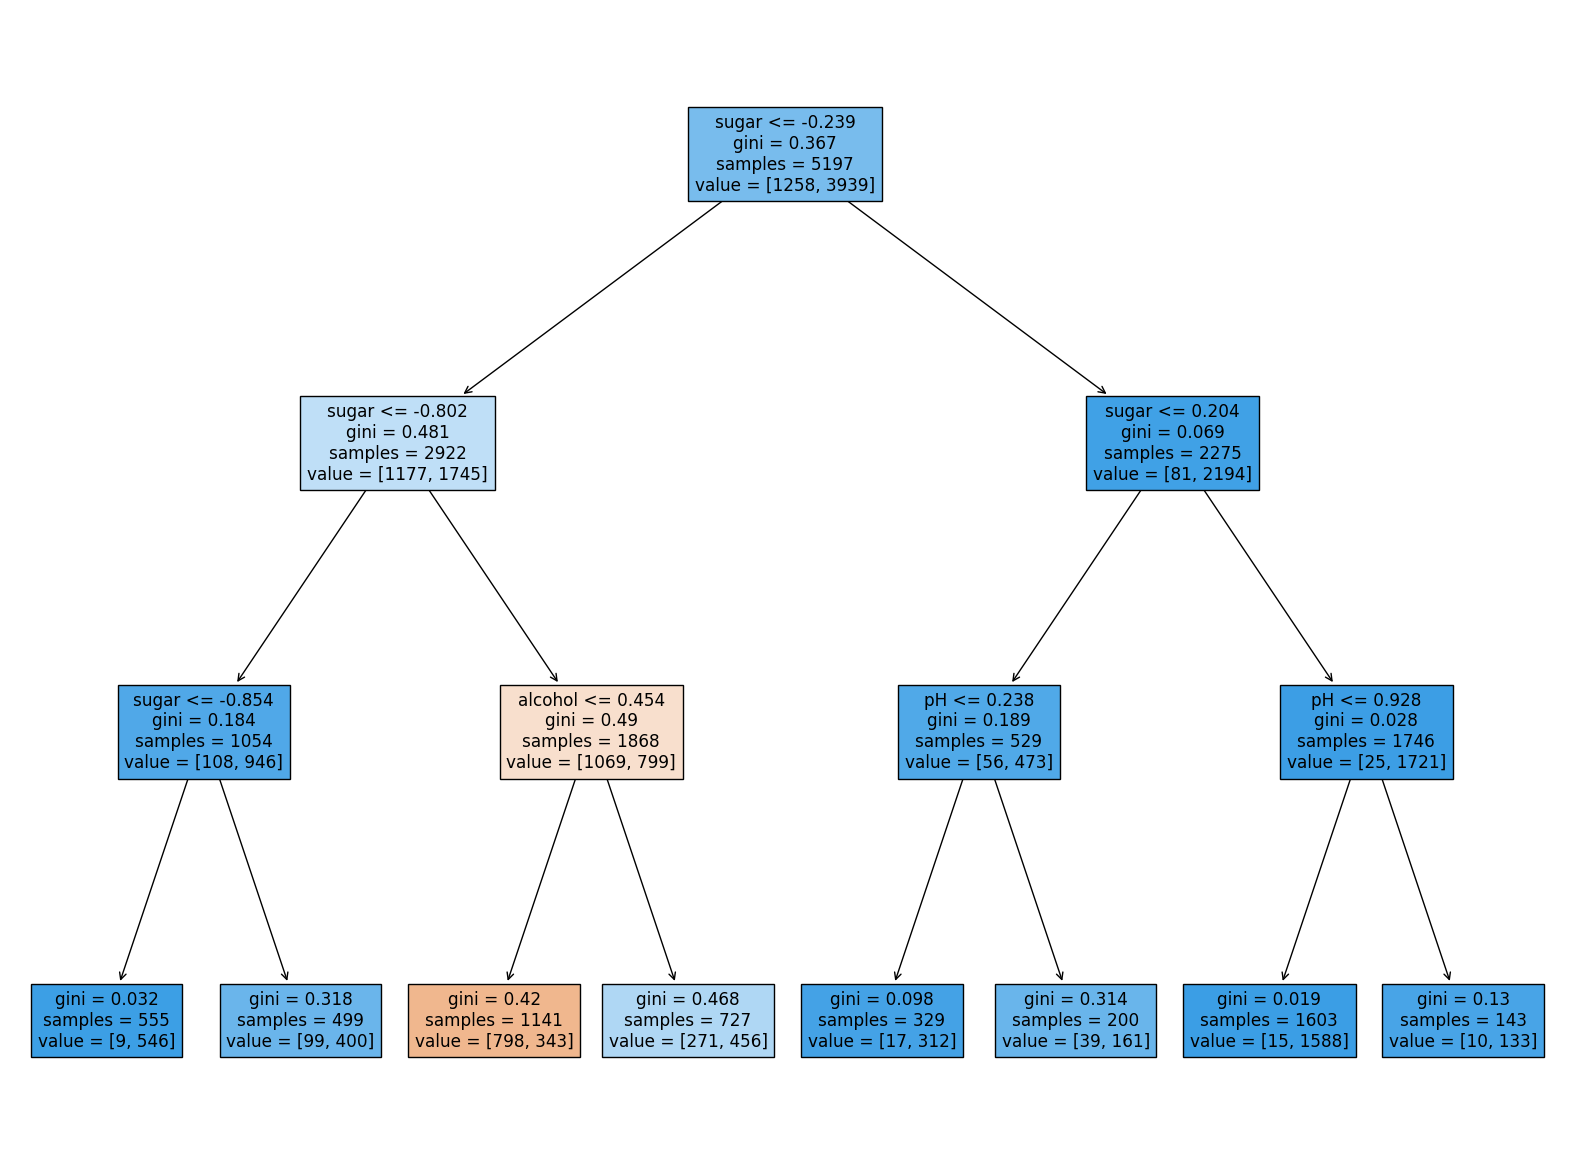

In [25]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()


### 스케일 조정하지 않은 특성 사용하기

In [27]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


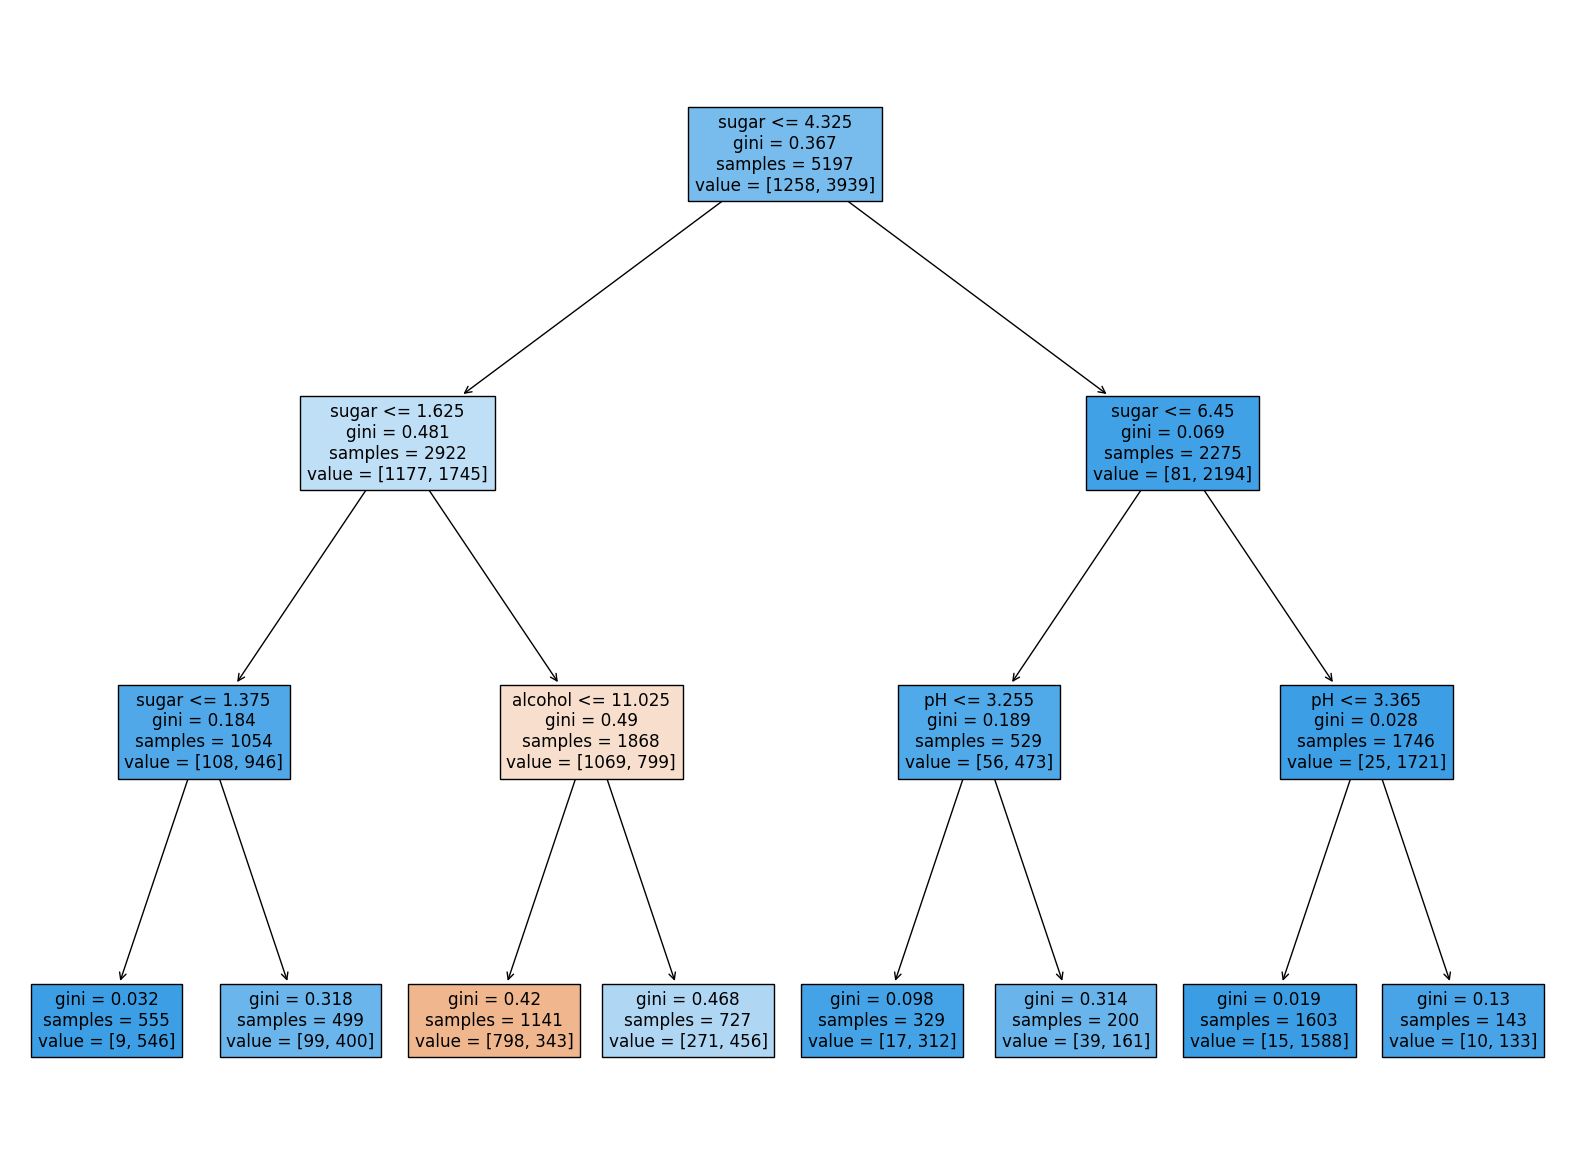

In [28]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [29]:
print(dt.feature_importances_)   ## 결정트리에서의 각 특성들(alcohol	sugar	pH) 간의 중요도

[0.12345626 0.86862934 0.0079144 ]


3 0.8454877814123533 0.8415384615384616
4 0.8572253223013276 0.8484615384615385
5 0.8672310948624207 0.8607692307692307
6 0.8766596113142198 0.8530769230769231
7 0.8895516644217818 0.8638461538461538
8 0.9003271117952665 0.8584615384615385
9 0.9130267461997306 0.8484615384615385
10 0.9291899172599577 0.8461538461538461
11 0.9426592264768135 0.8415384615384616
12 0.9555512795843756 0.8530769230769231
13 0.9667115643640561 0.86
14 0.9747931498941698 0.8561538461538462
15 0.9824898980180874 0.8569230769230769
16 0.98691552818934 0.86
17 0.9921108331729844 0.8638461538461538
18 0.9940350202039638 0.8553846153846154
19 0.9957667885318453 0.8561538461538462
20 0.9963440446411391 0.8615384615384616


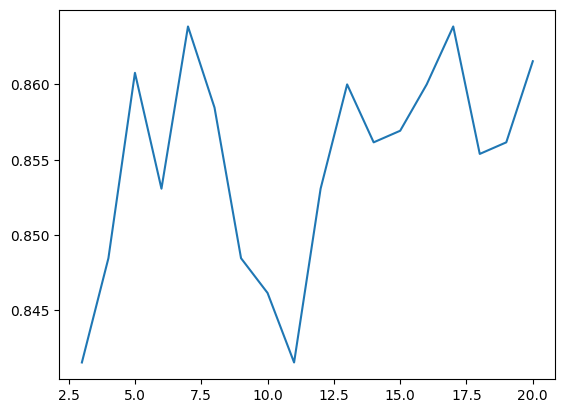

0.8638461538461538 7


In [35]:
# for문을 활용하여 max_depth의 값을 3~21 까지 대입하여 그중 정확도가 가장 높은 모델을 선별하기
dt_depth = []
dt_score = []
for depth in range(3, 21):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(train_input, train_target)
    print(depth, dt.score(train_input, train_target), dt.score(test_input, test_target))
    dt_score.append(dt.score(test_input, test_target))
    dt_depth.append(depth)

plt.plot(dt_depth, dt_score)
plt.show()

print(max(dt_score), dt_depth[dt_score.index(max(dt_score))])

In [36]:
# max_depth = 7 로 결정트리 구현하기
dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8895516644217818
0.8638461538461538


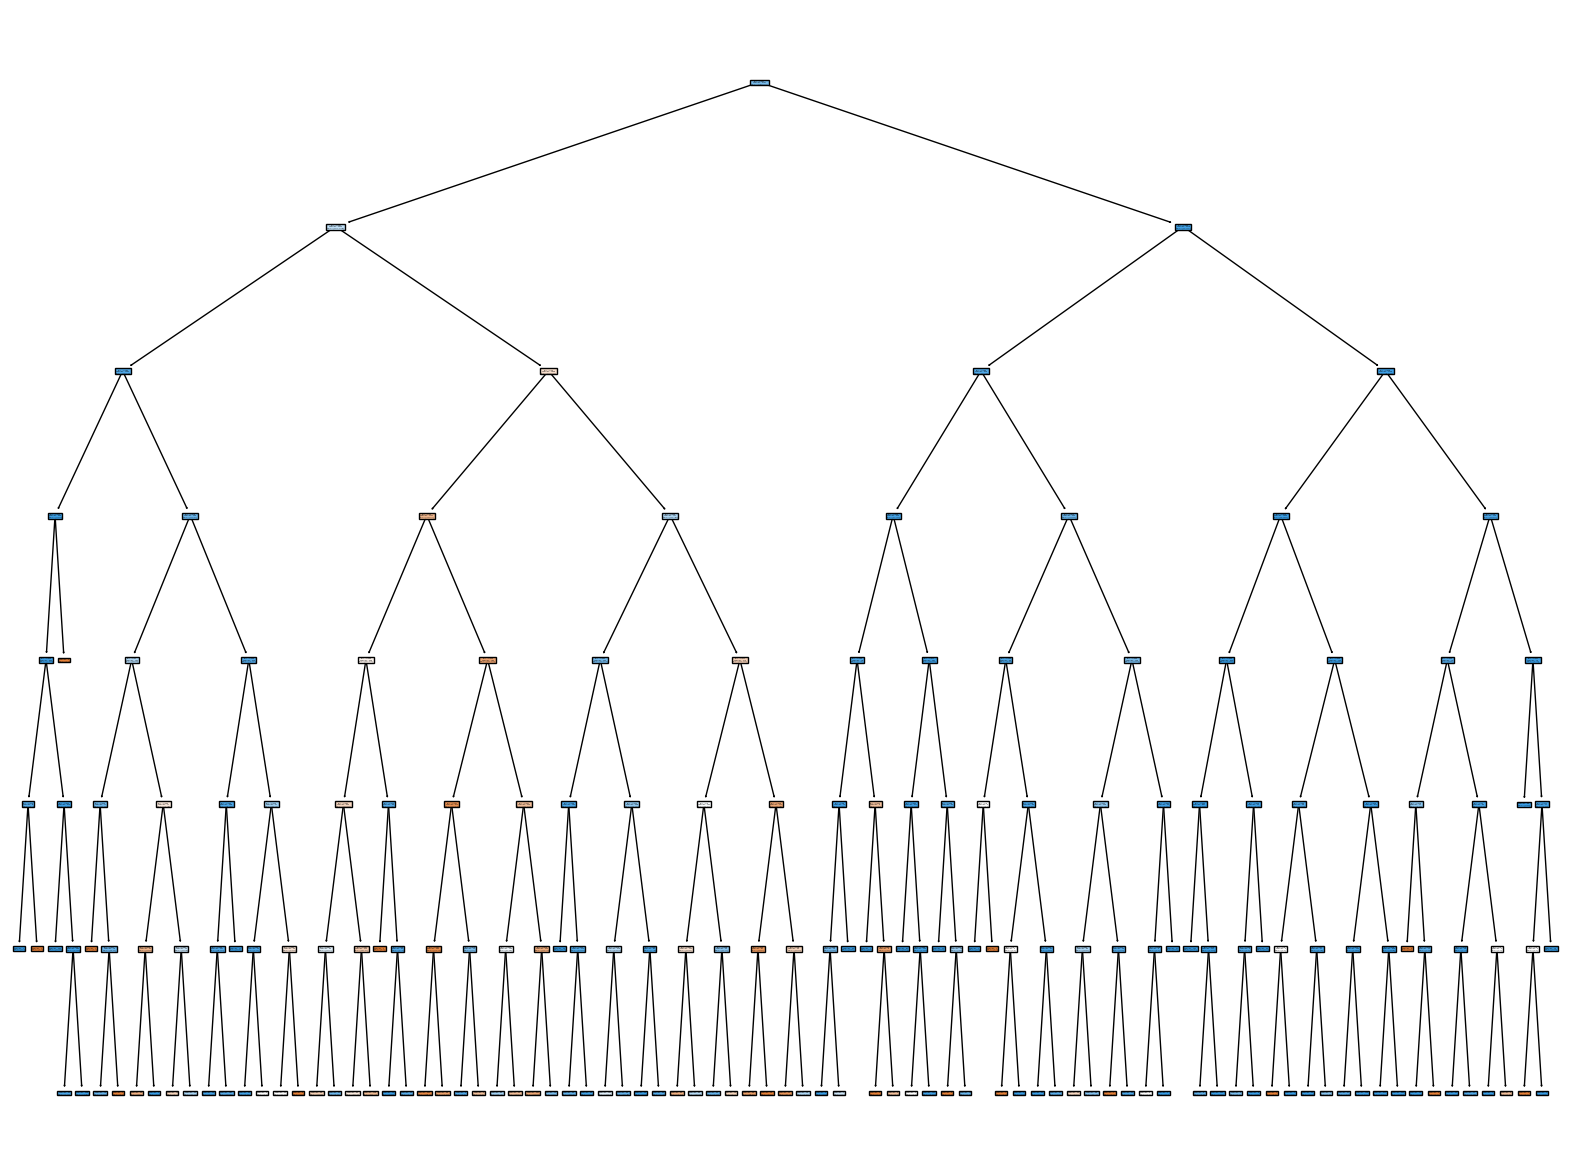

In [37]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()